In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,not spam,Will ï¿½_ b going to esplanade fr home?,NaN,NaN,NaN
5569,not spam,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,not spam,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,not spam,Rofl. Its true to its name,NaN,NaN,NaN


In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.rename(columns={'v1': 'label', 'v2': 'msg'}, inplace=True)

In [8]:
df.sample(5)

,label,msg
1535,spam,You have won a Nokia 7250i. This is what you g...
3540,not spam,If you are not coughing then its nothing
2766,spam,Married local women looking for discreet actio...
3962,not spam,If you ask her or she say any please message.
1268,spam,Can U get 2 phone NOW? I wanna chat 2 set up m...


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder = LabelEncoder()

In [11]:
df['label'] = encoder.fit_transform(df['label'])

In [12]:
df.sample(5)


,label,msg
946,1,Ur cash-balance is currently 500 pounds - to m...
1410,0,Pls speak to that customer machan.
4038,0,I cant pick the phone right now. Pls send a me...
5155,0,MY NEW YEARS EVE WAS OK. I WENT TO A PARTY WIT...
4736,0,Nt only for driving even for many reasons she ...


In [13]:
if(df.duplicated().any()):
    df.drop_duplicates(inplace=True)

([<matplotlib.patches.Wedge at 0x708010cef470>,
 [Text(-1.014499732282844, 0.4251944181172162, 'not spam'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.4%'),
  Text(0.553363565906573, -0.231924047755212, '12.6%')])

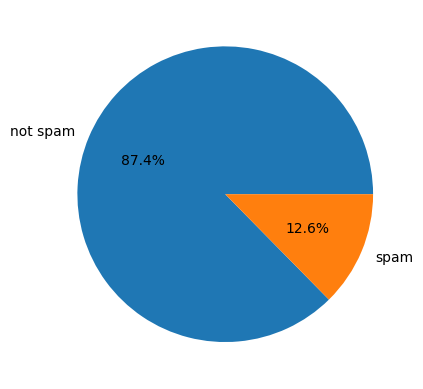

In [14]:
import matplotlib.pyplot as plt
import nltk 
plt.pie(df['label'].value_counts(), labels=['not spam', 'spam'], autopct='%1.1f%%')

In [15]:
# Add char, word, and sentence count columns
df['num_characters'] = df['msg'].apply(len)
df['num_words'] = df['msg'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['msg'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [16]:
df.sample(5)


,label,msg,num_characters,num_words,num_sentences
1747,0,I think u have the wrong number.,32,8,1
3093,0,Have you emigrated or something? Ok maybe 5.30...,67,14,2
4317,0,S...i will take mokka players only:),36,10,1
709,1,4mths half price Orange line rental & latest c...,160,31,4
3239,0,A cute thought for friendship: \Its not necess...,90,17,1


In [17]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.257110,18.460824,1.965564
std,58.354011,13.326981,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [18]:
df[df['label'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.708592,17.128654,1.820195
std,56.450840,13.496222,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [19]:
df.sample(5)


,label,msg,num_characters,num_words,num_sentences
3787,1,Want to funk up ur fone with a weekly new tone...,155,30,3
536,0,"Probably gonna be here for a while, see you la...",63,17,1
1184,0,"Yo, you around? Just got my car back",36,10,2
4216,0,Will be office around 4 pm. Now i am going hos...,52,13,2
2324,0,Ok lor.,7,3,1


<Axes: xlabel='num_characters', ylabel='Count'>

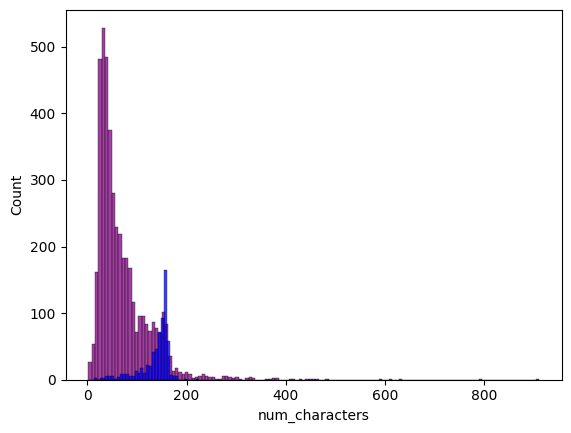

In [29]:
import seaborn as sns

sns.histplot(df[df['label'] == 0]['num_characters'], color='purple')
sns.histplot(df[df['label'] == 1]['num_characters'], color='blue')

In [22]:
df[df['label'] == 0]['num_characters']

0       111
1        29
3        49
4        61
6        77
       ... 
5565     12
5568     39
5569     57
5570    125
5571     26
Name: num_characters, Length: 4516, dtype: int64

In [ ]:
sns.histplot(